<a href="https://colab.research.google.com/github/LucasVCorrea/Data-Science/blob/main/mushrooms_analisis/Logistic_regression(baseline).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
from google.colab import drive

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

!pip install --upgrade category_encoders
import category_encoders  as ce
from matplotlib import pyplot as plt

drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
data_frame = pd.read_csv("/content/drive/MyDrive/Organizacion De Datos/trabajo_practico_2/secondary_data.csv",sep=";")

In [42]:
data_frame.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


Para aquellas filas con mucho porcentaje de nans ***(a mi criterio, las que tienen+60%)*** , voy a fillearlas con 'unknown', mientras que aquellas que tengan porcentaje bajo, voy a usar el **'most-frequent strategy'** de simpleImputer

In [43]:
(( len(data_frame) - data_frame.count() )*100 / len(data_frame)).nlargest(len(data_frame.columns))

veil-type               94.797688
spore-print-color       89.595376
veil-color              87.861272
stem-root               84.393064
stem-surface            62.427746
gill-spacing            41.040462
cap-surface             23.121387
gill-attachment         16.184971
ring-type                4.046243
class                    0.000000
stem-color               0.000000
habitat                  0.000000
has-ring                 0.000000
stem-width               0.000000
cap-diameter             0.000000
stem-height              0.000000
gill-color               0.000000
does-bruise-or-bleed     0.000000
cap-color                0.000000
cap-shape                0.000000
season                   0.000000
dtype: float64

# Separando la variable a predecir

In [44]:
X = data_frame.drop('class', axis=1)
y = data_frame['class']

In [45]:
y = y.map({"e":1,"p":0})

# Division de sets 

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=13)

# Imputacion

`Imputacion 1) Reemplazar por una constante`

In [47]:
X_train[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_train[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')
X_validation[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_validation[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')
X_test[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_test[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')

`Imputacion 2) Reemplazar por el mas frecuente`

In [48]:
from sklearn.impute import SimpleImputer
simple = SimpleImputer(strategy='most_frequent')

In [49]:
X_train = pd.DataFrame(simple.fit_transform(X_train), columns = X_train.columns)
X_validation = pd.DataFrame(simple.transform(X_validation), columns = X_validation.columns)
X_test = pd.DataFrame(simple.transform(X_test), columns = X_test.columns)

In [50]:
X_train[ ['cap-diameter', 'stem-height', 'stem-width'] ] = X_train[ ['cap-diameter', 'stem-height', 'stem-width'] ].astype(float)
X_validation[ ['cap-diameter', 'stem-height', 'stem-width'] ] = X_validation[ ['cap-diameter', 'stem-height', 'stem-width'] ].astype(float)
X_test[ ['cap-diameter', 'stem-height', 'stem-width'] ] = X_test[ ['cap-diameter', 'stem-height', 'stem-width'] ].astype(float)

# Encodings

OHE

In [51]:
ohe_ring = OneHotEncoder()

encoded_ring_train = ohe_ring.fit_transform(X_train[['has-ring']]).todense().astype(int)
encoded_ring_validation = ohe_ring.transform(X_validation[['has-ring']]).todense().astype(int)
encoded_ring_test = ohe_ring.transform(X_test[['has-ring']]).todense().astype(int)

encoded_bruise_train = ohe_ring.fit_transform(X_train[['does-bruise-or-bleed']]).todense().astype(int)
encoded_bruise_validation = ohe_ring.transform(X_validation[['does-bruise-or-bleed']]).todense().astype(int)
encoded_bruise_test = ohe_ring.transform(X_test[['does-bruise-or-bleed']]).todense().astype(int)

In [52]:
X_train['has-ring'] = encoded_ring_train
X_validation['has-ring'] = encoded_ring_validation
X_test['has-ring'] = encoded_ring_test

X_train['does-bruise-or-bleed'] = encoded_bruise_train
X_validation['does-bruise-or-bleed'] = encoded_bruise_validation
X_test['does-bruise-or-bleed'] = encoded_bruise_test

binaryEncoding

In [53]:
bin_encoded = ce.BinaryEncoder(cols=["cap-shape","cap-surface","cap-color","gill-attachment","gill-spacing","gill-color","stem-root","stem-surface",
                                     "stem-color","veil-type","veil-color","ring-type","spore-print-color","habitat" ,"season"], return_df = True)

X_train = bin_encoded.fit_transform(X_train)
X_validation = bin_encoded.transform(X_validation)
X_test = bin_encoded.transform(X_test)

# Regresion Logistica

## Busqueda de hiper-parametros

In [54]:
log_reg = LogisticRegression(max_iter=2000)
params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.0001, 0.001, 0.01, 0.1 , 1, 10, 100],
}

rs = RandomizedSearchCV(log_reg, param_distributions=params, n_iter=5, random_state=13, scoring='roc_auc')

## Entrenamos

In [55]:
rs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

RandomizedSearchCV(estimator=LogisticRegression(max_iter=2000), n_iter=5,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None]},
                   random_state=13, scoring='roc_auc')

## Mejores hiper-parametros

In [56]:
rs.best_params_

{'penalty': 'l2', 'C': 10}

## Mejor modelo

In [57]:
model = rs.best_estimator_

In [58]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=2000)

In [59]:
model.coef_

array([[ 1.07845076e-01, -7.47466657e-01,  2.29054425e-01,
         2.05296826e-01,  8.30245394e-03,  3.79192147e-02,
         4.81516946e-01, -4.96875083e-01, -6.46710890e-01,
        -2.45659795e-01, -6.00604261e-01,  3.23268240e-01,
         5.76145594e-01,  4.98824120e-01, -3.47068963e-01,
        -1.02469612e+00,  7.63684258e-01,  1.57987659e+00,
         1.50079718e-01, -4.96871697e-01,  6.16528255e-01,
        -6.57163758e-01,  1.76881602e-01, -5.21825107e-02,
        -8.65914717e+00, -1.09413774e+00, -8.35351088e-01,
        -6.37895293e+00, -3.25183290e-01,  1.08121144e+00,
        -3.34452853e-02, -1.91679960e-01, -1.34719023e-01,
         8.30815840e-01,  1.46063882e+00, -6.39597127e+00,
        -1.37953862e+00, -1.35605171e+01,  8.39287409e+00,
         5.50833918e+00,  1.21584019e-01,  3.52860653e+00,
        -3.52383570e-01,  8.60456326e-01,  2.68611517e+00,
         1.00675510e+01, -2.04657799e+00, -1.04028735e-01,
         3.29047750e+00,  4.00175220e+00,  4.11360213e-0

## Feature Importance

In [60]:
importances_list = [item for sublist in abs(model.coef_) for item in sublist]

In [61]:
features_binary = model.feature_names_in_

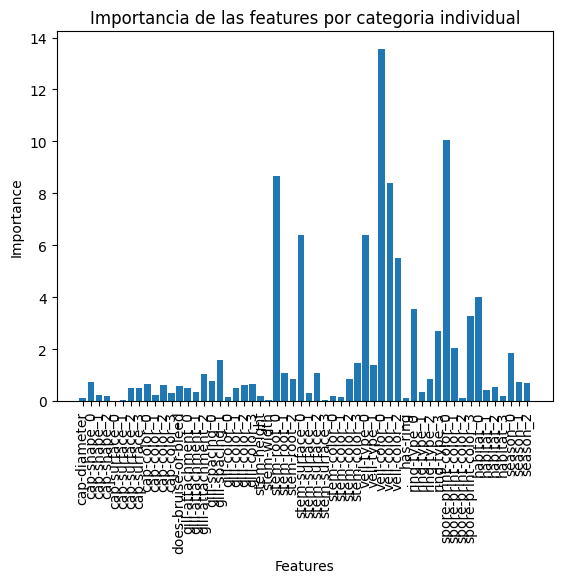

In [62]:
plt.bar(X_train.columns, importances_list)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Importancia de las features por categoria individual')
plt.xticks(rotation=90)
plt.show()

In [63]:
dicc = {}
for i in range ( 0 , len(features_binary) ):
  features_binary_clean = features_binary[i].split('_')[0]
  if features_binary_clean not in dicc:
    dicc[features_binary_clean] = importances_list[i]
  else:
    dicc[features_binary_clean] += importances_list[i]

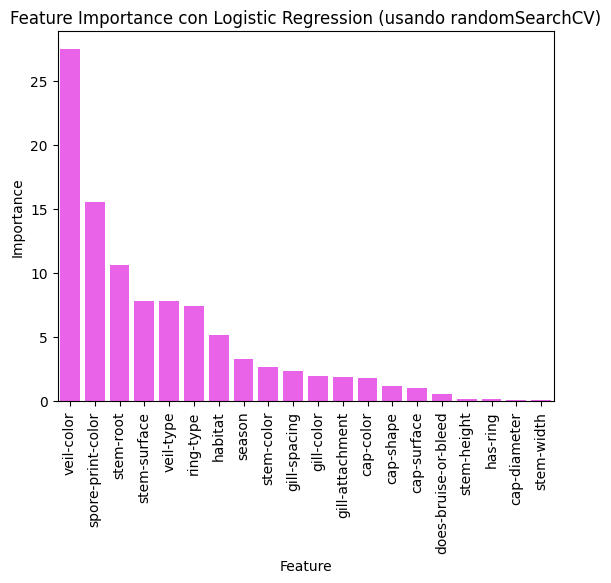

In [64]:
plt.tight_layout()
my_df = pd.DataFrame(dicc.items())
my_df.columns = ['Feature' , 'Importance']
my_df = my_df.sort_values(by='Importance', ascending = False)

import seaborn as sns
ax = sns.barplot(x='Feature', y='Importance', data=my_df, color = '#ff4dff')
ax.set(xlabel = 'Feature', ylabel='Importance', title='Feature Importance con Logistic Regression (usando randomSearchCV)',)
plt.xticks(rotation=90)
images_dir = '/content/drive/MyDrive/Organizacion De Datos/trabajo_practico_2'
plt.savefig(f"{images_dir}/Logistic_regressionFI.png",bbox_inches='tight')

plt.show()

In [65]:
from sklearn.metrics import confusion_matrix,roc_auc_score

In [66]:
y_pred = model.predict(X_validation)

In [67]:
cm = confusion_matrix(y_validation, y_pred)
cm

array([[2760,  614],
       [ 747, 1986]])

## Evaluacion del modelo

Score para validation

In [68]:
validation_best_score = roc_auc_score(y_validation, model.predict_proba(X_validation)[:,1])
print("AUC_ROC: %f" % (validation_best_score))

AUC_ROC: 0.865128


Score para Test

In [69]:
test_best_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("AUC_ROC: %f" % (test_best_score))

AUC_ROC: 0.855204


#PREGUNTAS 

## ¿Cuál es el mejor score de validación obtenido?

El mejor score de validación obtenido

In [70]:
validation_best_score

0.8651278767857603

## ¿Cómo conviene obtener el dataset para validar?

Se puede splitear random tranquilamente ya que no hay variables que tengan que ver con el tiempo. (No hay time-travelling)

## Al predecir con este modelo para test, ¿Cúal es el score obtenido? 

Score obtenido para test

In [71]:
test_best_score

0.8552040927950243

##¿Qué features son los más importantes para predecir con el mejor modelo?

Lista de las features de mas a menos importante. Gráfico en la sección 'Feature Importance'

In [72]:
my_df['Feature'].to_list()

['veil-color',
 'spore-print-color',
 'stem-root',
 'stem-surface',
 'veil-type',
 'ring-type',
 'habitat',
 'season',
 'stem-color',
 'gill-spacing',
 'gill-color',
 'gill-attachment',
 'cap-color',
 'cap-shape',
 'cap-surface',
 'does-bruise-or-bleed',
 'stem-height',
 'has-ring',
 'cap-diameter',
 'stem-width']

# CSV con predicciones

In [73]:
y_predict_test = model.predict(X_test)

In [74]:
compare_df = pd.DataFrame(y_test)

In [75]:
compare_df['predicted'] = y_predict_test

In [76]:
compare_df.columns = ['actual_class' , 'predicted_class']
compare_df = compare_df.drop(['actual_class'], axis=1)

In [77]:
compare_df

,predicted_class
37726,0
10734,0
44627,1
39270,0
22460,0
...,...
38769,0
2800,0
42584,1
23210,1


In [78]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/Organizacion De Datos/trabajo_practico_2/predicciones_logistic_regression.csv')  
compare_df.to_csv(filepath,index=True)